# 1. Libraries and dataset

Importing the basic libraries for the analysis:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

If the libraries are not installed, you can run `!pip install pandas numpy seaborn matplotlib`

Loading the Titanic dataset:

In [2]:
data = sns.load_dataset("titanic")

# 2. First look into the dataset

We will first take a look into the first few rows:

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


And learn more about each variable:

In [4]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now we must learn which data types we are working with,

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Check for missing values,

In [6]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

As well as for infinite values:

In [7]:
numerical_data = data.select_dtypes(include=["number"])
inf_mask = numerical_data.map(np.isinf)
inf_mask.sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# 3. Data wrangling

Filling missing age values with the mean age:

In [8]:
data["age"] = data["age"].fillna(data["age"].mean())

Filling missing embarked values with the mode:


In [9]:
data["embarked"] = data["embarked"].fillna(data["embarked"].mode()[0])

Some columns are irrelevant and/or unusable to the analysis and can be dropped:

In [10]:
data.drop(["deck", "embark_town", "alive", "who"], axis=1, inplace=True)

# 4. Analyzing the dataset

Age distribution:

C:\Users\sgxer\anaconda3\envs\first_python_data_science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


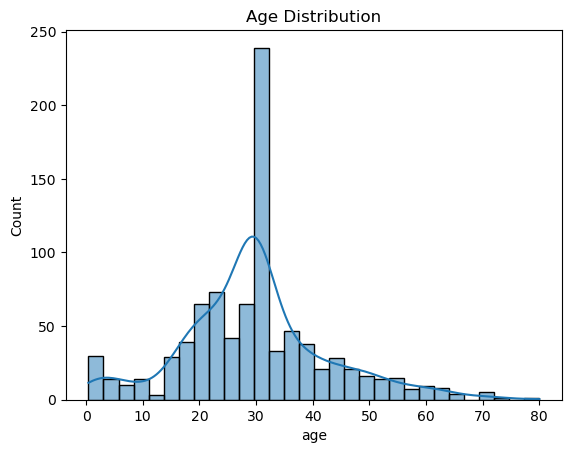

In [11]:
sns.histplot(data["age"], kde=True)
plt.title("Age Distribution")
plt.show()

Fare by passenger class:

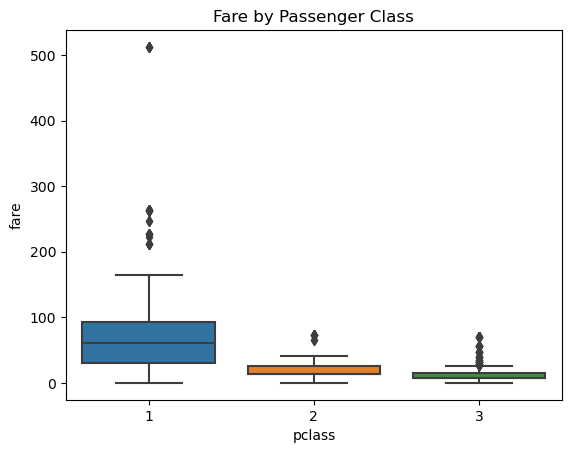

In [12]:
sns.boxplot(x="pclass", y="fare", data=data)
plt.title("Fare by Passenger Class")
plt.show()

Survival rate by gender:

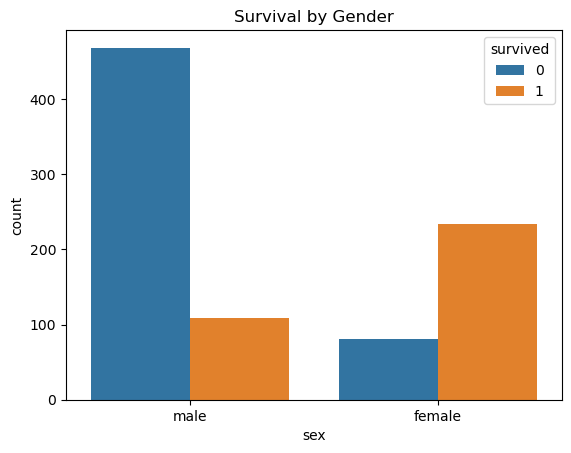

In [13]:
sns.countplot(x="sex", hue="survived", data=data)
plt.title("Survival by Gender")
plt.show()

Survival rate by passenger class

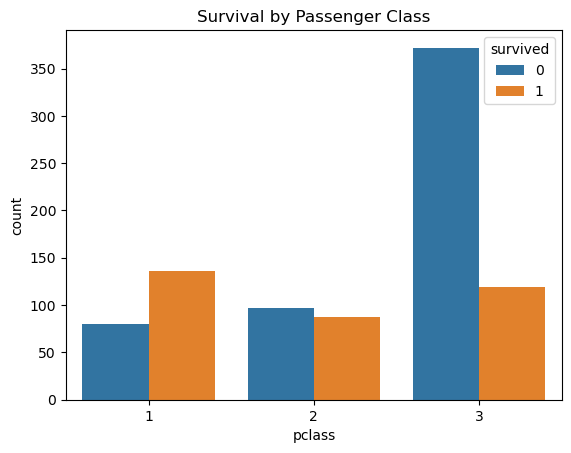

In [14]:
sns.countplot(x="pclass", hue="survived", data=data)
plt.title("Survival by Passenger Class")
plt.show()

# 5. Extended analysis

Correlation matrix:

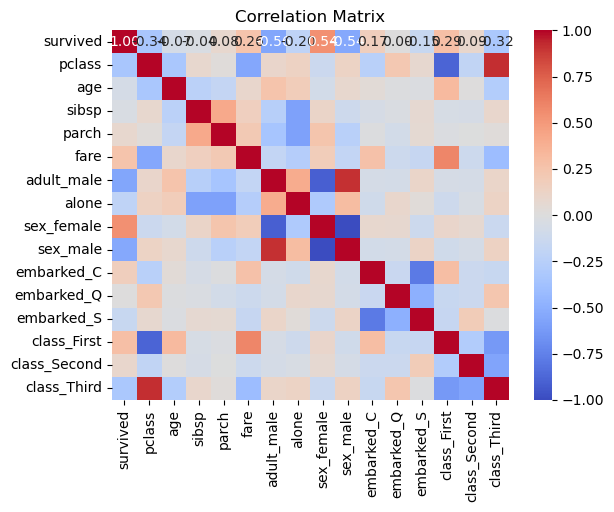

In [15]:
dummies_data = pd.get_dummies(data, columns=["sex", "embarked", "class"])
corr = dummies_data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Survival rate by age groups:

C:\Users\sgxer\anaconda3\envs\first_python_data_science\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\sgxer\anaconda3\envs\first_python_data_science\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


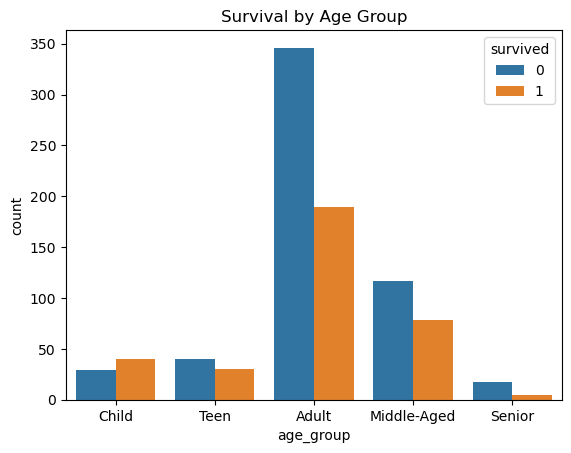

In [16]:
data["age_group"] = pd.cut(data["age"], bins=[0, 12, 18, 35, 60, 80], labels=["Child", "Teen", "Adult", "Middle-Aged", "Senior"])
sns.countplot(x="age_group", hue="survived", data=data)
plt.title("Survival by Age Group")
plt.show()